In [1]:
# Supervised ML

# Regression -- Polynomial Regression

# Second Project : Predicting Salary Based On Level

# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# Select Independent And Dependent Variable

X = data.Level.values.reshape(-1,1)   # reshape(n,1) -1 = x kisah berapa byk row, 1 = tapi nk hanya 1 column
Y = data.Salary.values

In [4]:
# Model Developmant       -- try guna simple linear tengok boleh regression line cover or tak data point
lin_reg.fit(X,Y)

LinearRegression()

In [5]:
data['Predicted_Salary'] = lin_reg.predict(X)

In [6]:
data[['Level','Salary','Predicted_Salary']]

,Level,Salary,Predicted_Salary
0,1,45000,-114454.545455
1,2,50000,-33575.757576
2,3,60000,47303.030303
3,4,80000,128181.818182
4,5,110000,209060.606061
5,6,150000,289939.393939
6,7,200000,370818.181818
7,8,300000,451696.969697
8,9,500000,532575.757576
9,10,1000000,613454.545455


In [7]:
pred_values = lin_reg.predict(X)
print(pred_values)

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


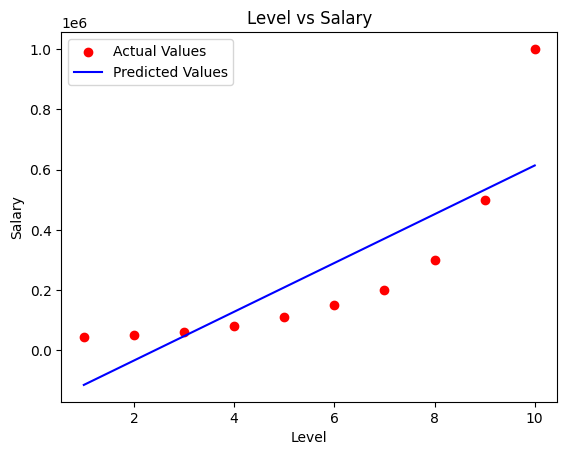

In [8]:
# Plot Actual Values                          -- dataset ni x boleh guna simple linear.. line jauh lari data point
plt.scatter(X,Y,color='red', label='Actual Values')
# Plot The Predicted Values
plt.plot(X,pred_values,color='blue',label='Predicted Values')
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [9]:
# Let's Try Using Normalization -- because the range is big  -- before go to Polynomial

import sklearn.preprocessing as pp

Y_nrmlz = pp.normalize([Y]).flatten()     # ([]) convert to 2D then .flatten() to conver back 2D into 1D
Y_nrmlz

array([0.03764241, 0.0418249 , 0.05018988, 0.06691984, 0.09201478,
       0.1254747 , 0.16729959, 0.25094939, 0.41824899, 0.83649797])

In [10]:
# Model Developmant
lin_reg.fit(X,Y_nrmlz)

LinearRegression()

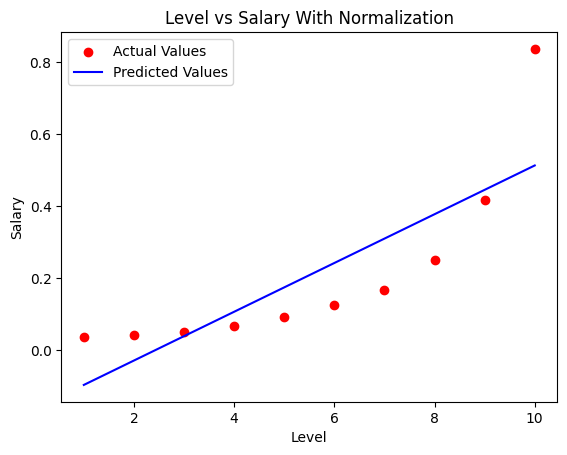

In [11]:
# Plot Actual Values                                      -- try guna normalization pon x boleh, line masih lari jauh dr data point
plt.scatter(X,Y_nrmlz,color='red', label='Actual Values')
# Plot The Predicted Values
plt.plot(X,lin_reg.predict(X),color='blue',label='Predicted Values')
plt.title('Level vs Salary With Normalization')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [12]:
# Polynomial Regression

# Polynomial regression is a type of regression analysis that models a non-linear
# relationship between the independent and dependent variables

# Generate Polynomial Features

# by default the degree of independent variable is 1
# but in Polynomial Regression we will increase the degree of Independent Variable
# and then we will Train Our Model

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly_2 = poly.fit_transform(X)  # X is IV --> transform it --> degree = 1 to 2
x_poly_2

# when degree = 2 , then new features will be created like this   1   x*1   x*x
# when degree = 2 , then new features will be created like this   1   x*1   x*x  x*x*x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [13]:
# Train our model using Degree = 2
lin_reg.fit(x_poly_2,Y)

LinearRegression()

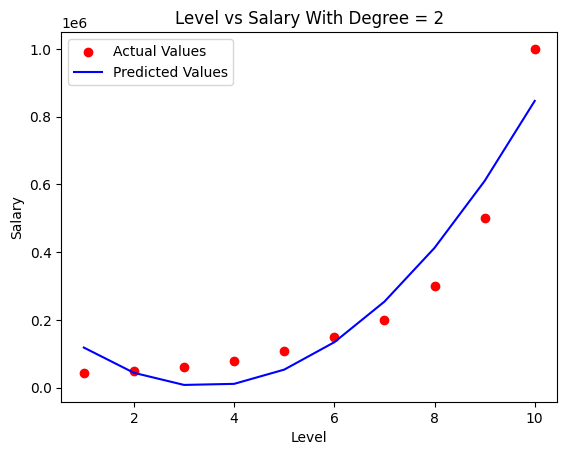

In [14]:
# Plot Actual Values                                      -- guna polynomial degree = 2
plt.scatter(X,Y,color='red', label='Actual Values')
# Plot The Predicted Values
plt.plot(X,lin_reg.predict(x_poly_2),color='blue',label='Predicted Values')
plt.title('Level vs Salary With Degree = 2')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

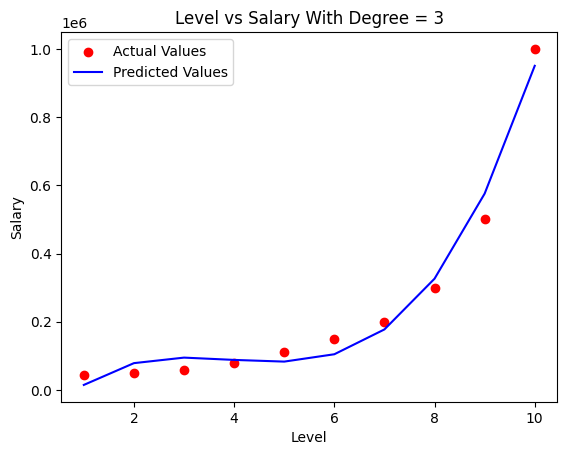

In [15]:
# Train our model using Degree = 3

poly = PolynomialFeatures(degree=3)
x_poly_3 = poly.fit_transform(X)

lin_reg.fit(x_poly_3,Y)

# Plot Actual Values                                      -- guna polynomial degree = 3
plt.scatter(X,Y,color='red', label='Actual Values')

# Plot The Predicted Values
plt.plot(X,lin_reg.predict(x_poly_3),color='blue',label='Predicted Values')
plt.title('Level vs Salary With Degree = 3')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

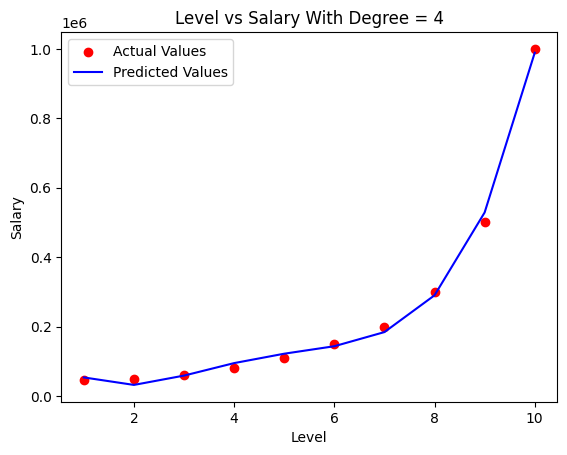

In [16]:
# Train our model using Degree = 4

poly = PolynomialFeatures(degree=4)
x_poly_4 = poly.fit_transform(X)

lin_reg.fit(x_poly_4,Y)

# Plot Actual Values                                      -- guna polynomial degree = 4
plt.scatter(X,Y,color='red', label='Actual Values')

# Plot The Predicted Values
plt.plot(X,lin_reg.predict(x_poly_4),color='blue',label='Predicted Values')
plt.title('Level vs Salary With Degree = 4')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [17]:
# R-squared
# help you to know how well the explain the data
# or how well the model fits the data

from sklearn.metrics import r2_score
accuracy = r2_score(Y,lin_reg.predict(x_poly_4))

print('Regression Score Function:',accuracy)
print(f'Regression Score Function: {int(accuracy*100)}%')

Regression Score Function: 0.9973922891706614
Regression Score Function: 99%


In [18]:
# Final Prediction

level = int(input('Enter The Level: '))
level = poly.fit_transform([[level]])
predict_sal =lin_reg.predict(level)
print('Predicted Salary',int(predict_sal[0]))

Enter The Level: 3
Predicted Salary 58642


Degree 1 - R2 Score: 66%
Degree 2 - R2 Score: 91%
Degree 3 - R2 Score: 98%
Degree 4 - R2 Score: 99%
Degree 5 - R2 Score: 99%


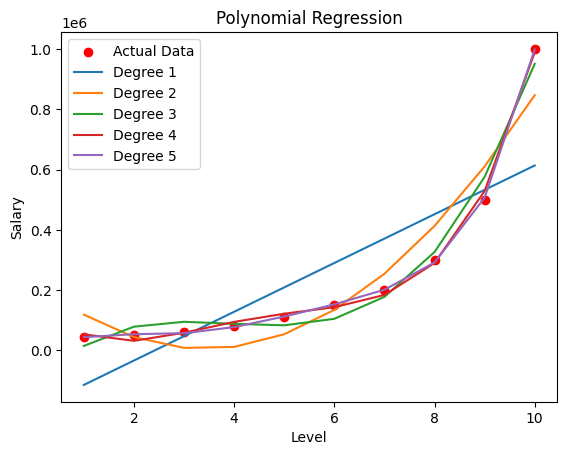

In [19]:
# Final Code For Polynomial Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
X = data[['Level']].values
y = data['Salary'].values

# Try polynomial degrees 1 to 5
plt.scatter(X, y, color='red', label='Actual Data')

for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # Predict using the same X (no grid)
    y_pred = lin_reg.predict(X_poly)

    # Calculate r2 score
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} - R2 Score: {int(r2*100)}%")

    # Plot the curve
    plt.plot(X, y_pred, label=f'Degree {degree}')

plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [20]:
# Prediction

level = int(input('Enter The Level: '))
level = poly.fit_transform([[level]])
predict_sal =lin_reg.predict(level)

print('Predicted Salary',int(predict_sal[0]))

Enter The Level: 3
Predicted Salary 57065
